# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 1

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


In [ ]:
# ==============================================================================
# Code from here. Best of luckk :)
# ==============================================================================

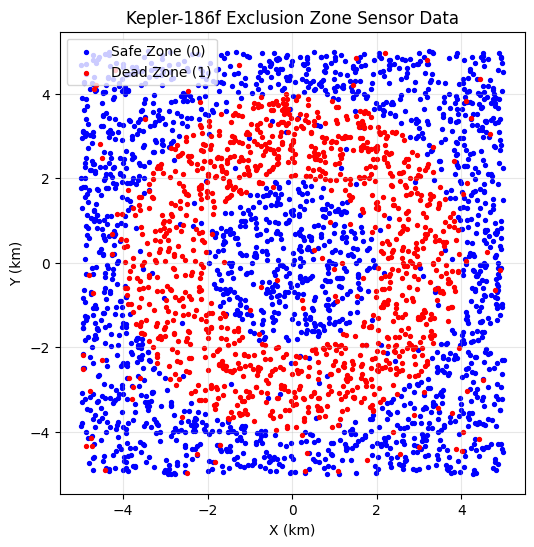

In [ ]:
# Plot complete dataset
X, y = generate_data()

# Convert to numpy for plotting
X = X.numpy()
y = y.numpy().squeeze()

# Split by class
safe = (y == 0)
dead = (y == 1)

plt.figure(figsize=(6, 6))
plt.scatter(X[safe, 0], X[safe, 1], s=8, c='blue', label='Safe Zone (0)')
plt.scatter(X[dead, 0], X[dead, 1], s=8, c='red', label='Dead Zone (1)')

plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Kepler-186f Exclusion Zone Sensor Data')
plt.legend()
plt.axis('equal')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# split into train and test set
from sklearn.model_selection import train_test_split
# convert to same datatype for ease
X_full=X_full.to(torch.float64)
y_full=y_full.to(torch.float64)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)
print(X_train.size(),y_train.size())

torch.Size([2100, 2]) torch.Size([2100, 1])


In [ ]:
from sklearn.metrics import accuracy_score
class MyANN():
  # data set X has 2 input features (x,y)
  def __init__(self,X):
    # Initialize weights and biases

    # Layer-1
    w1 = torch.randn(X.shape[1], 16, dtype=torch.float64, requires_grad=True)
    b1 = torch.zeros(16, dtype=torch.float64, requires_grad=True)

    # Layer-2
    w2 = torch.randn(16, 16, dtype=torch.float64, requires_grad=True)
    b2 = torch.zeros(16, dtype=torch.float64, requires_grad=True)

    # Layer-3
    w3 = torch.randn(16, 16, dtype=torch.float64, requires_grad=True)
    b3 = torch.zeros(16, dtype=torch.float64, requires_grad=True)

    # Layer-4
    w4 = torch.randn(16, 1, dtype=torch.float64, requires_grad=True)
    b4 = torch.zeros(1, dtype=torch.float64, requires_grad=True)

    # pack in 1 list
    self.w = [w1, w2, w3, w4]
    self.b = [b1, b2, b3, b4]

    self.params = self.w + self.b

  def forward(self, X):
    # Forward pass through the network

    z = X # input layer initially
    for i in range(len(self.w)-1):
      z = torch.matmul(z, self.w[i]) + self.b[i]
      z = torch.relu(z)

    # deal last layer seperately
    z = torch.matmul(z, self.w[3]) + self.b[3]
    z = torch.sigmoid(z)

    return z

  # gives y_pred in binary form
  def predict(self, X):
    with torch.no_grad():
        return (self.forward(X) >= 0.5).int()

   # trains the model with given learning rate and epochs
  def train(self,X_train,y_train,X_val,y_val,lr,epochs):
    train_loss=[]
    train_acc=[]
    val_loss=[]
    val_acc=[]

    # give complete dataset in 1 epoch
    for _ in range(epochs):
      # forward pass
      y_pred=self.forward(X_train)

      # loss
      loss=self.loss_bce(y_pred,y_train)

      # backward prop to compute grads
      loss.backward()

      # update params w/o grad tracking
      with torch.no_grad():
        for i in range(len(self.w)):
          self.w[i]-=lr*self.w[i].grad
          self.b[i]-=lr*self.b[i].grad

        # Make predictions on val set to get the loss
        y_pred_val=self.forward(X_val)
        val_loss.append(self.loss_bce(y_pred_val,y_val).item())
        train_loss.append(loss.item())

        # Get training and validation accuracy
        y_pred_train = self.predict(X_train)
        y_pred_val = self.predict(X_val)
        train_acc.append(accuracy_score(y_train, y_pred_train))
        val_acc.append(accuracy_score(y_val, y_pred_val))


      # zero the grads
      for i in range(len(model.w)):
        self.w[i].grad.zero_()
        self.b[i].grad.zero_()

      # save to object
      self.train_loss=train_loss
      self.train_acc=train_acc
      self.val_loss=val_loss
      self.val_acc=val_acc

      print(f"Epoch: {_+1}, Loss: {loss.item()}")

  # binary cross entropy loss
  @staticmethod
  def loss_bce(y_pred,y_train):
    # clamp predictions
    eps=1e-7
    y_pred=torch.clamp(y_pred,eps,1-eps)
    # find loss
    loss=-(y_train*torch.log(y_pred)+(1-y_train)*torch.log(1-y_pred))
    return loss.mean()

In [ ]:
model=MyANN(X_train)
model.train(X_train,y_train,X_test,y_test,0.01,8000)

Streaming output truncated to the last 5000 lines.
Epoch: 3001, Loss: 0.41779352342423515
Epoch: 3002, Loss: 0.4169877541002545
Epoch: 3003, Loss: 0.41740076974856893
Epoch: 3004, Loss: 0.4166169156152045
Epoch: 3005, Loss: 0.41699120044152665
Epoch: 3006, Loss: 0.4162387471332284
Epoch: 3007, Loss: 0.4166006526998216
Epoch: 3008, Loss: 0.4159096907058324
Epoch: 3009, Loss: 0.4162774150880674
Epoch: 3010, Loss: 0.41559631301977956
Epoch: 3011, Loss: 0.41596211211211753
Epoch: 3012, Loss: 0.41528236753078646
Epoch: 3013, Loss: 0.41566472901321455
Epoch: 3014, Loss: 0.41495490292519044
Epoch: 3015, Loss: 0.4152916959997603
Epoch: 3016, Loss: 0.41457354460009377
Epoch: 3017, Loss: 0.41486255892240775
Epoch: 3018, Loss: 0.41416119956631803
Epoch: 3019, Loss: 0.41436432699402875
Epoch: 3020, Loss: 0.4136909918923357
Epoch: 3021, Loss: 0.4138802787445479
Epoch: 3022, Loss: 0.4132523181249822
Epoch: 3023, Loss: 0.41340548196666815
Epoch: 3024, Loss: 0.412767571342699
Epoch: 3025, Loss: 0.4128

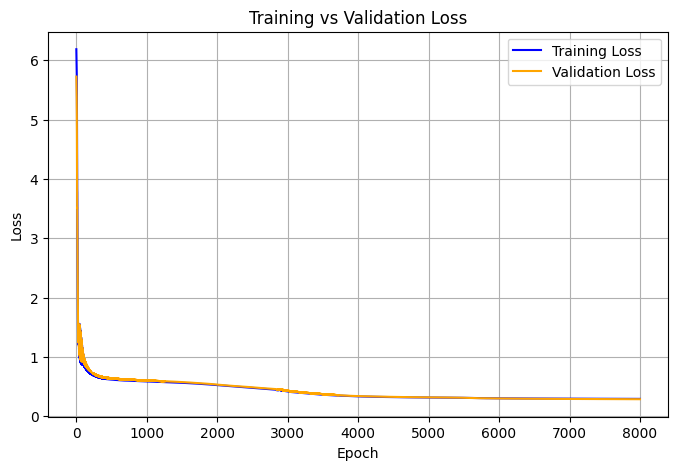

In [ ]:
# Plot training and validation loss over all epochs in same plot
import matplotlib.pyplot as plt

epochs = range(1, len(model.train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, model.train_loss, color='blue', label='Training Loss')
plt.plot(epochs, model.val_loss, color='orange', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.show()

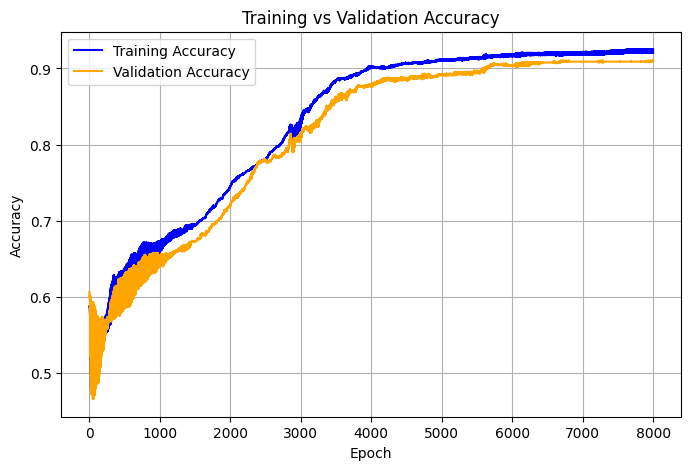

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

epochs = range(1, len(model.train_acc) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, model.train_acc, color='blue', label='Training Accuracy')
plt.plot(epochs, model.val_acc, color='orange', label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.show()

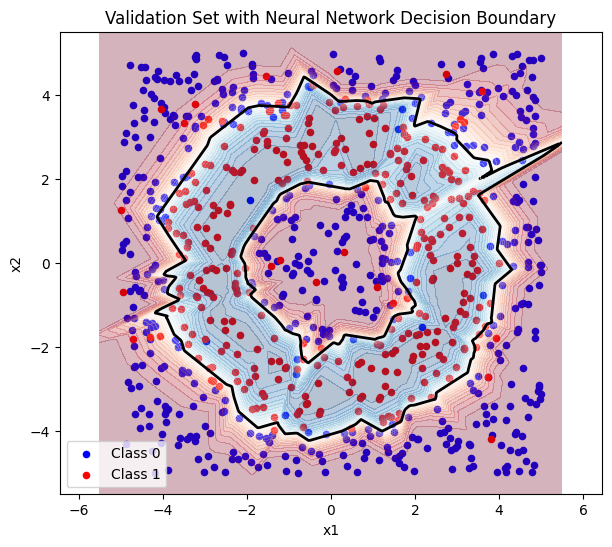

In [ ]:
# Plot decision boundary
X_test = X_test.to(torch.float64)
y_test = y_test.to(torch.float64).squeeze()   # (N,)

# make 2-D grid
x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid = torch.tensor(grid, dtype=torch.float64)

# model prediction on grid
with torch.no_grad():
    Z = model.forward(grid)

Z = Z.reshape(xx.shape).cpu().numpy()


plt.figure(figsize=(7, 6))

plt.scatter(
    X_test[y_test == 0, 0],
    X_test[y_test == 0, 1],
    c='blue', s=20, label='Class 0'
)

plt.scatter(
    X_test[y_test == 1, 0],
    X_test[y_test == 1, 1],
    c='red', s=20, label='Class 1'
)

# decision boundary at confidence=0.5
plt.contour(
    xx, yy, Z,
    levels=[0.5],
    colors='black',
    linewidths=2
)


plt.contourf(
    xx, yy, Z,
    levels=30,
    cmap='RdBu',
    alpha=0.3
)


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Validation Set with Neural Network Decision Boundary')
plt.legend()
plt.axis('equal')
plt.show()